<a href="https://colab.research.google.com/github/nikita30panwar/machine-learning/blob/main/nikita_panwar_assignment2_801372070.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Github Link: https://github.com/nikita30panwar/machine-learning/blob/be0c2c76549fcd9e11aac65b891d4f4e82bc3e00/Assignments/Assingment_2_Nikita_Panwar_801372070.ipynb

1.a) Develop a gradient decent training and evaluation code that predicts housing price based on the following input variables:

area, bedrooms, bathrooms, stories, parking

Identify the best parameters for your linear regression model, based on the above input variables.

Plot the training and validation losses (MSE) (in a single graph, but two different lines). For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [174]:
!git clone https://github.com/nikita30panwar/machine-learning.git

fatal: destination path 'machine-learning' already exists and is not an empty directory.


In [175]:
data = pd.read_csv('machine-learning/Data/Housing.csv',na_values='*')
data.head()
m = len(data)

In [176]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dataTrain, dataTest =train_test_split(data, train_size = 0.8, test_size = 0.2)
dataTrain.shape

(436, 13)

In [177]:
list = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
dataTrainA = dataTrain[list]
dataTestA = dataTest[list]
dataTrainA.head()

,price,area,bedrooms,bathrooms,stories,parking
542,1750000,3620,2,1,1,0
496,2695000,4000,2,1,1,0
484,2870000,3040,2,1,1,0
507,2590000,3600,2,1,1,0
252,4515000,9860,3,1,1,0


In [178]:
xTrain = dataTrainA.values[:,1:6]
xTest = dataTestA.values[:,1:6]
yTrain = dataTrainA.values[:,0]
yTest = dataTestA.values[:,0]
xTrain.shape

(436, 5)

In [179]:
#1 column of ones
x11 = np.ones((436, 1))
x12 = np.ones((109, 1))

In [180]:
# 1d to 2d
x21 = xTrain.reshape(436, 5)
x22 = xTest.reshape(109, 5)

In [181]:
xTrainA= np.hstack((x11, x21))
xTestA = np.hstack((x12, x22))
xTrainA.shape

(436, 6)

In [182]:
# initializing
iterations = 1000;
alpha = 0.000000001;
theta = [0., 0., 0., 0., 0., 0.]
theta
#print(X)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [183]:
# defined cost function
def cost_function(X,y,theta):
 m = len(X)
 predictions = X.dot(theta)
 errors = np.subtract(predictions, y)
 sqrErrors = np.square(errors)
 J = 1 / (2 * m) * np.sum(sqrErrors)
 return J


In [184]:
# define gradient descent.
def gradient_descent(X1, X2, Y1 , Y2, theta, alpha, iterations):
  cost_History_Train = np.zeros(iterations)
  cost_History_Test = np.zeros(iterations)

  for i in range(iterations):
    predictions = X1.dot(theta)
    errors = np.subtract(predictions, Y1)
    sum_delta = (alpha / m) * X1.transpose().dot(errors);
    theta = theta - sum_delta;
    cost_History_Train[i] = cost_function(X1, Y1, theta)
    cost_History_Test[i] = cost_function(X2, Y2, theta)
  return theta, cost_History_Train, cost_History_Test

In [185]:
theta, cost_History_Train, cost_History_Test = gradient_descent(xTrainA, xTestA,yTrain,yTest, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_History_Train =', cost_History_Train[-1], 'cost_History_Test= ', cost_History_Test[-1])

Final value of theta = [4.16134544e-01 8.61036321e+02 1.49720341e+00 7.88268207e-01
 1.19127741e+00 3.85293408e-01]
cost_History_Train = 1704611031406.1357 cost_History_Test=  1550660672651.8142


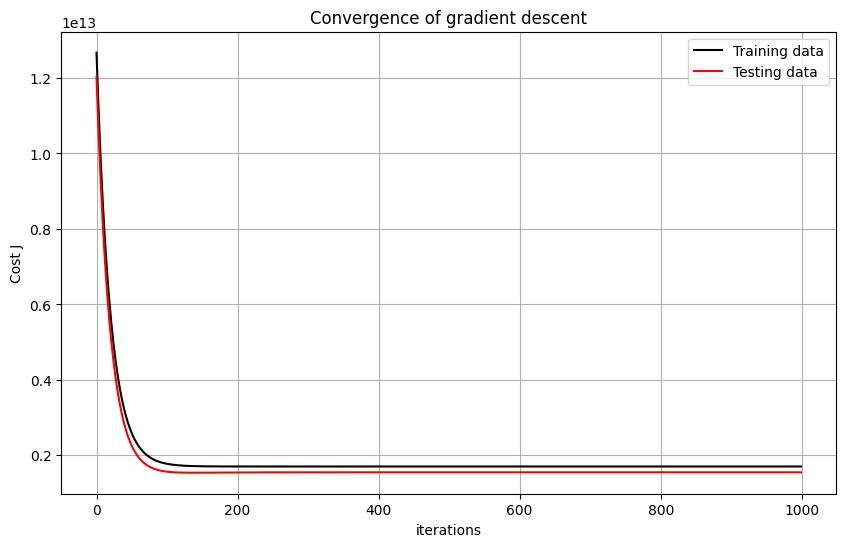

In [186]:
plt.plot(cost_History_Train, label = "Training data", color='black')
plt.plot(cost_History_Test, label = "Testing data", color='red')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent')
plt.legend()

In [187]:
print("Final Theta - ")
print(theta)

Final Theta - 
[4.16134544e-01 8.61036321e+02 1.49720341e+00 7.88268207e-01
 1.19127741e+00 3.85293408e-01]


# **2.a) Repeat problem 1 a, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. **

Plot the training and validation losses for both training and validation set based on input standardization and input normalization. Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 a. Which input scaling achieves the best training? Explain your results.







In [188]:
data = pd.read_csv('machine-learning/Data/Housing.csv',na_values='*')
data.head()
m = len(data)

In [189]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dataTrain, dataTest =train_test_split(data, train_size = 0.8, test_size = 0.2)
dataTrain.shape

(436, 13)

In [190]:
list = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
dataTrainB = dataTrain[list]
dataTestB = dataTest[list]
dataTrainA.head()

,price,area,bedrooms,bathrooms,stories,parking
542,1750000,3620,2,1,1,0
496,2695000,4000,2,1,1,0
484,2870000,3040,2,1,1,0
507,2590000,3600,2,1,1,0
252,4515000,9860,3,1,1,0


In [191]:
#from matplotlib.colors import Normalize
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler, Normalizer

scaler = Normalizer()
dataTrainB[list] = scaler.fit_transform(dataTrainB[list])
dataTestB[list] = scaler.fit_transform(dataTestB[list])
dataTrainB.head(10)

,price,area,bedrooms,bathrooms,stories,parking
542,0.999998,0.002069,1.142855e-06,5.714273e-07,5.714273e-07,0.000000e+00
496,0.999999,0.001484,7.421142e-07,3.710571e-07,3.710571e-07,0.000000e+00
484,0.999999,0.001059,6.968637e-07,3.484319e-07,3.484319e-07,0.000000e+00
507,0.999999,0.001390,7.722000e-07,3.861000e-07,3.861000e-07,0.000000e+00
252,0.999998,0.002184,6.644502e-07,2.214834e-07,2.214834e-07,0.000000e+00
263,1.000000,0.000900,6.802718e-07,2.267573e-07,4.535146e-07,0.000000e+00
240,1.000000,0.000838,6.543073e-07,2.181024e-07,4.362049e-07,2.181024e-07
175,0.999998,0.001867,7.619034e-07,3.809517e-07,3.809517e-07,3.809517e-07
385,0.999999,0.001020,5.602238e-07,2.801119e-07,2.801119e-07,0.000000e+00
374,1.000000,0.000967,5.494503e-07,5.494503e-07,2.747251e-07,0.000000e+00


In [192]:
xTrain2 = dataTrainB.values[:,1:6]
xTest2 = dataTestB.values[:,1:6]
yTrain2 = dataTrainB.values[:,0]
yTest2 = dataTestB.values[:,0]
xTrain2.shape

(436, 5)

In [193]:
#matrix - 1col of ones
x31 = np.ones((436, 1))
x32 = np.ones((109, 1))

In [194]:
# 1d to 2d
x41 = xTrain2.reshape(436, 5)
x42 = xTest2.reshape(109, 5)

In [195]:
xTrainNew2 = np.hstack((x31, x41))
xTestNew2 = np.hstack((x32, x42))
xTrainNew2.shape

(436, 6)

In [196]:
# initialization
iterations = 1000;
alpha = 0.001;
theta = [0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [197]:
#define cost function
def compute_function(X, Y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)
  return J

In [198]:
#define gradient descent
def gradient_descent(X1, X2, Y1 , Y2, theta, alpha, iterations):
  cost_History_Train = np.zeros(iterations)
  cost_History_Test = np.zeros(iterations)

  for i in range(iterations):
    predictions = X1.dot(theta)
    errors = np.subtract(predictions, Y1)
    sum_delta = (alpha / m) * X1.transpose().dot(errors);
    theta = theta - sum_delta;
    cost_History_Train[i] = compute_function(X1, Y1, theta)
    cost_History_Test[i] = compute_function(X2, Y2, theta)
  return theta,  cost_History_Train,   cost_History_Test

In [199]:
theta, cost_History_Train, cost_History_Test = gradient_descent(xTrainNew2, xTestNew2, yTrain2, yTest2, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_History_Train =', cost_History_Train[-1], 'cost_History_Test= ', cost_History_Test[-1])

Final value of theta = [5.50814207e-01 6.31638694e-04 3.79383116e-07 1.59928440e-07
 2.24396941e-07 8.02998347e-08]
cost_History_Train = 0.0807066186240419 cost_History_Test=  0.020176660623240836


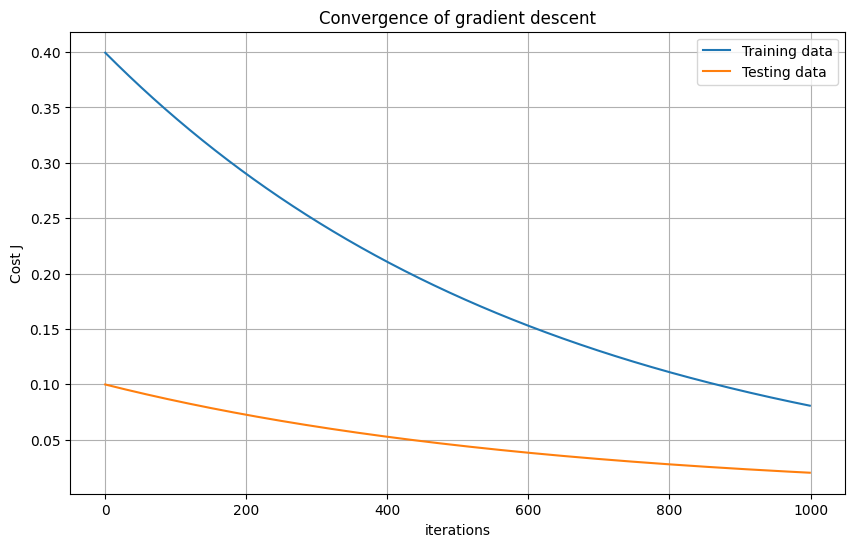

In [200]:
plt.plot(cost_History_Train, label = "Training data")
plt.plot(cost_History_Test, label = "Testing data")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent')
plt.legend()

In [201]:
print("Final Theta - ")
print(theta)

Final Theta - 
[5.50814207e-01 6.31638694e-04 3.79383116e-07 1.59928440e-07
 2.24396941e-07 8.02998347e-08]


**For Standerdize**

**Input standardization as part of pre-processing logic**

In [202]:
data = pd.read_csv('machine-learning/Data/Housing.csv',na_values='*')
data.head()
m = len(data)

In [203]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dataTrain, dataTest =train_test_split(data, train_size = 0.8, test_size = 0.2)
dataTrain.shape

(436, 13)

In [204]:
list = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
dataTrainB = dataTrain[list]
dataTestB = dataTest[list]
dataTrainA.head()

,price,area,bedrooms,bathrooms,stories,parking
542,1750000,3620,2,1,1,0
496,2695000,4000,2,1,1,0
484,2870000,3040,2,1,1,0
507,2590000,3600,2,1,1,0
252,4515000,9860,3,1,1,0


In [205]:
#from matplotlib.colors import Normalize
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler, Normalizer
scaler = StandardScaler()
dataTrainB[list] = scaler.fit_transform(dataTrainB[list])
dataTestB[list] = scaler.fit_transform(dataTestB[list])
dataTrainB.head(10)

,price,area,bedrooms,bathrooms,stories,parking
542,-1.586001,-0.716772,-1.294376,-0.573307,-0.933142,-0.819149
496,-1.090971,-0.538936,-1.294376,-0.573307,-0.933142,-0.819149
484,-0.999299,-0.988206,-1.294376,-0.573307,-0.933142,-0.819149
507,-1.145974,-0.726132,-1.294376,-0.573307,-0.933142,-0.819149
252,-0.137579,2.203478,0.052516,-0.573307,-0.933142,-0.819149
263,-0.192583,-0.553912,0.052516,-0.573307,0.212914,-0.819149
240,-0.100910,-0.613815,0.052516,-0.573307,0.212914,0.325559
175,0.247444,2.175399,1.399408,1.475561,0.212914,1.470267
385,-0.632610,-0.707412,-1.294376,-0.573307,-0.933142,-0.819149
374,-0.595941,-0.763571,-1.294376,1.475561,-0.933142,-0.819149


In [206]:
xTrain2 = dataTrainB.values[:,1:6]
xTest2 = dataTestB.values[:,1:6]
yTrain2 = dataTrainB.values[:,0]
yTest2 = dataTestB.values[:,0]
xTrain2.shape

(436, 5)

In [207]:
#matrix - 1col of ones
x31 = np.ones((436, 1))
x32 = np.ones((109, 1))

In [208]:
# 1d to 2d
x41 = xTrain2.reshape(436, 5)
x42 = xTest2.reshape(109, 5)

In [209]:
xTrainNew2 = np.hstack((x31, x41))
xTestNew2 = np.hstack((x32, x42))
xTrainNew2.shape

(436, 6)

In [210]:
# initializing
iterations = 1000;
alpha = 0.01;
theta = [0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [211]:
# define cost function
def compute_function(X, Y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)
  return J

In [212]:
# define Gradient descent
def gradient_descent(X1, X2, Y1 , Y2, theta, alpha, iterations):
  cost_History_Train = np.zeros(iterations)
  cost_History_Test = np.zeros(iterations)

  for i in range(iterations):
    predictions = X1.dot(theta)
    errors = np.subtract(predictions, Y1)
    sum_delta = (alpha / m) * X1.transpose().dot(errors);
    theta = theta - sum_delta;
    cost_History_Train[i] = compute_function(X1, Y1, theta)
    cost_History_Test[i] = compute_function(X2, Y2, theta)
  return theta,  cost_History_Train,   cost_History_Test

In [213]:
theta, cost_History_Train, cost_History_Test = gradient_descent(xTrainNew2, xTestNew2, yTrain2, yTest2, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_History_Train =', cost_History_Train[-1], 'cost_History_Test= ', cost_History_Test[-1])

Final value of theta = [2.68303219e-16 3.87870620e-01 9.04102358e-02 3.03604550e-01
 2.39617915e-01 1.60569409e-01]
cost_History_Train = 0.17847785867645652 cost_History_Test=  0.03892348541035558


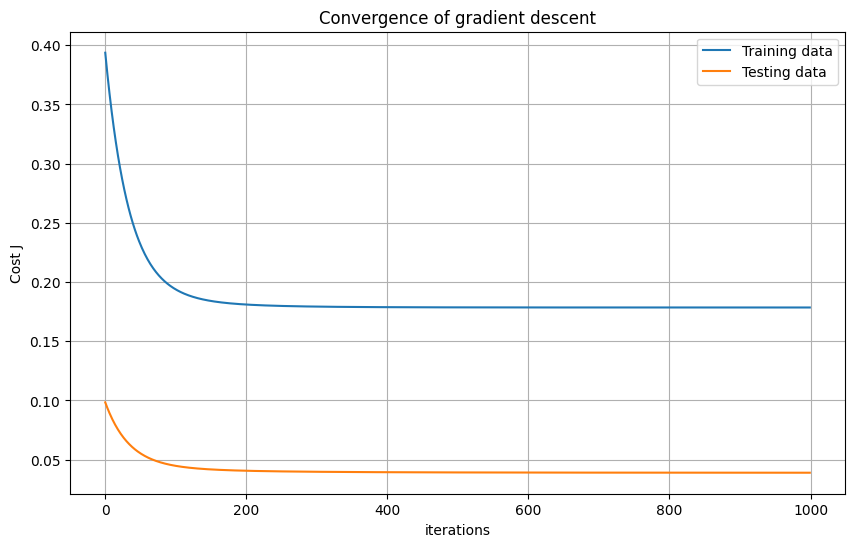

In [214]:
plt.plot(cost_History_Train, label = "Training data")
plt.plot(cost_History_Test, label = "Testing data")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent')
plt.legend()

In [215]:
print("Final Theta - ")
print(theta)

Final Theta - 
[2.68303219e-16 3.87870620e-01 9.04102358e-02 3.03604550e-01
 2.39617915e-01 1.60569409e-01]


As it can be noticed cost history of normalization is much smaller than cost history of standardization and cost history of standardization is much smaller than no preprocessing in Q1.


**Question 3a repeating 2a with panelty**

3.a) Repeat problem 2 a, this time by adding parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change the equation to compute MSE loss for the training and evaluation set.  

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 a.







In [216]:
data = pd.read_csv('machine-learning/Data/Housing.csv',na_values='*')
data.head()
m = len(data)

In [217]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dataTrain, dataTest =train_test_split(data, train_size = 0.8, test_size = 0.2)
dataTrain.shape

(436, 13)

In [218]:
list = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
dataTrainB = dataTrain[list]
dataTestB = dataTest[list]
dataTrainB.head()

,price,area,bedrooms,bathrooms,stories,parking
542,1750000,3620,2,1,1,0
496,2695000,4000,2,1,1,0
484,2870000,3040,2,1,1,0
507,2590000,3600,2,1,1,0
252,4515000,9860,3,1,1,0


In [219]:
#from matplotlib.colors import Normalize
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler, Normalizer
scaler = Normalizer()
dataTrainB[list] = scaler.fit_transform(dataTrainB[list])
dataTestB[list] = scaler.fit_transform(dataTestB[list])
dataTrainB.head(10)

,price,area,bedrooms,bathrooms,stories,parking
542,0.999998,0.002069,1.142855e-06,5.714273e-07,5.714273e-07,0.000000e+00
496,0.999999,0.001484,7.421142e-07,3.710571e-07,3.710571e-07,0.000000e+00
484,0.999999,0.001059,6.968637e-07,3.484319e-07,3.484319e-07,0.000000e+00
507,0.999999,0.001390,7.722000e-07,3.861000e-07,3.861000e-07,0.000000e+00
252,0.999998,0.002184,6.644502e-07,2.214834e-07,2.214834e-07,0.000000e+00
263,1.000000,0.000900,6.802718e-07,2.267573e-07,4.535146e-07,0.000000e+00
240,1.000000,0.000838,6.543073e-07,2.181024e-07,4.362049e-07,2.181024e-07
175,0.999998,0.001867,7.619034e-07,3.809517e-07,3.809517e-07,3.809517e-07
385,0.999999,0.001020,5.602238e-07,2.801119e-07,2.801119e-07,0.000000e+00
374,1.000000,0.000967,5.494503e-07,5.494503e-07,2.747251e-07,0.000000e+00


In [220]:
xTrain2 = dataTrainB.values[:,1:6]
xTest2 = dataTestB.values[:,1:6]
yTrain2 = dataTrainB.values[:,0]
yTest2 = dataTestB.values[:,0]
xTrain2.shape

(436, 5)

In [221]:
#matrix - 1col of ones
x31 = np.ones((436, 1))
x32 = np.ones((109, 1))

In [222]:
# 1d to 2d
x41 = xTrain2.reshape(436, 5)
x42 = xTest2.reshape(109, 5)

In [223]:
xTrainNew2 = np.hstack((x31, x41))
xTestNew2 = np.hstack((x32, x42))
xTrainNew2.shape

(436, 6)

In [224]:
# initializing
iterations = 1000;
alpha = 0.001;
penalty_lambda= 10
theta = [0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [225]:
# defined cost function
def cost_function(X,y,theta):
 m = len(X)
 predictions = X.dot(theta)
 errors = np.subtract(predictions, y)
 sqrErrors = np.square(errors)
 J = 1 / (2 * m) * np.sum(sqrErrors)
 return J

In [226]:
# defined gradient descent with penalty
def gradient_descent_with_panelty(X1, X2, Y1 , Y2, theta, alpha, iterations,penalty_lambda):
  cost_History_Train = np.zeros(iterations)
  cost_History_Test = np.zeros(iterations)

  for i in range(iterations):
    predictions = X1.dot(theta)
    errors = np.subtract(predictions, Y1)
    sum_delta = (alpha / m) * X1.transpose().dot(errors);
    penalty =np.multiply((penalty_lambda * alpha / m), theta)
    sum_delta += penalty
    theta = theta - sum_delta;
    cost_History_Train[i] = compute_function(X1, Y1, theta)
    cost_History_Test[i] = compute_function(X2, Y2, theta)
  return theta,  cost_History_Train,   cost_History_Test

In [227]:
theta, cost_History_Train, cost_History_Test = gradient_descent_with_panelty(xTrainNew2, xTestNew2, yTrain2, yTest2, theta, alpha, iterations,penalty_lambda)
print('Final value of theta =', theta)
print('cost_History_Train =', cost_History_Train[-1], 'cost_History_Test= ', cost_History_Test[-1])

Final value of theta = [5.46454174e-01 6.26638886e-04 3.76380066e-07 1.58662508e-07
 2.22620701e-07 7.96642122e-08]
cost_History_Train = 0.08228099149417491 cost_History_Test=  0.020570253885482843


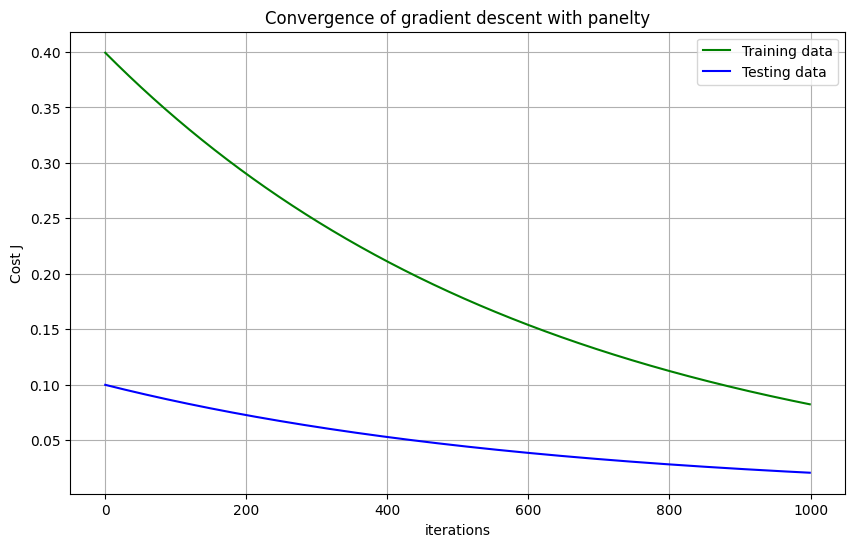

In [228]:
plt.plot(cost_History_Train, label = "Training data",color='green')
plt.plot(cost_History_Test, label = "Testing data",color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent with panelty')
plt.legend()

In [229]:
print("Final Theta - ")
print(theta)

Final Theta - 
[5.46454174e-01 6.26638886e-04 3.76380066e-07 1.58662508e-07
 2.22620701e-07 7.96642122e-08]


### **for standardization**

In [230]:
#from matplotlib.colors import Normalize
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler, Normalizer
scaler = StandardScaler()
dataTrainB[list] = scaler.fit_transform(dataTrainB[list])
dataTestB[list] = scaler.fit_transform(dataTestB[list])
dataTrainB.head(10)

,price,area,bedrooms,bathrooms,stories,parking
542,-1.993349,2.072748,1.762740,2.514175,0.896643,-0.747292
496,-0.497323,0.758854,0.207087,0.721912,-0.198608,-0.747292
484,0.281634,-0.196754,0.031427,0.519535,-0.322281,-0.747292
507,-0.302076,0.546891,0.323879,0.856468,-0.116381,-0.747292
252,-2.346543,2.331911,-0.094400,-0.615987,-1.016198,-0.747292
263,0.506742,-0.555302,-0.032981,-0.568814,0.252116,-0.747292
240,0.584686,-0.695294,-0.133774,-0.646229,0.157499,0.370707
175,-1.420792,1.618765,0.283908,0.810417,-0.144523,1.205476
385,0.340995,-0.285853,-0.499001,-0.091570,-0.695727,-0.747292
374,0.416261,-0.404068,-0.540823,2.317595,-0.725171,-0.747292


In [231]:
xTrain2 = dataTrainB.values[:,1:6]
xTest2 = dataTestB.values[:,1:6]
yTrain2 = dataTrainB.values[:,0]
yTest2 = dataTestB.values[:,0]
xTrain2.shape

(436, 5)

In [232]:
# 1d to 2d
x41 = xTrain2.reshape(436, 5)
x42 = xTest2.reshape(109, 5)

In [233]:
# 1d to 2d
x41 = xTrain2.reshape(436, 5)
x42 = xTest2.reshape(109, 5)

In [234]:
xTrainNew2 = np.hstack((x31, x41))
xTestNew2 = np.hstack((x32, x42))
xTrainNew2.shape

(436, 6)

In [235]:
# initializing
iterations = 1000;
alpha = 0.001;
penalty_lambda= 10
theta = [0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [236]:
# defined cost function
def cost_function(X,y,theta):
 m = len(X)
 predictions = X.dot(theta)
 errors = np.subtract(predictions, y)
 sqrErrors = np.square(errors)
 J = 1 / (2 * m) * np.sum(sqrErrors)
 return J

In [237]:
# defined gradient descent with penalty
def gradient_descent_with_panelty(X1, X2, Y1 , Y2, theta, alpha, iterations,penalty_lambda):
  cost_History_Train = np.zeros(iterations)
  cost_History_Test = np.zeros(iterations)

  for i in range(iterations):
    predictions = X1.dot(theta)
    errors = np.subtract(predictions, Y1)
    sum_delta = (alpha / m) * X1.transpose().dot(errors);
    penalty =np.multiply((penalty_lambda * alpha / m), theta)
    sum_delta += penalty
    theta = theta - sum_delta;
    cost_History_Train[i] = compute_function(X1, Y1, theta)
    cost_History_Test[i] = compute_function(X2, Y2, theta)
  return theta,  cost_History_Train,   cost_History_Test

In [238]:
theta, cost_History_Train, cost_History_Test = gradient_descent_with_panelty(xTrainNew2, xTestNew2, yTrain2, yTest2, theta, alpha, iterations,penalty_lambda)
print('Final value of theta =', theta)
print('cost_History_Train =', cost_History_Train[-1], 'cost_History_Test= ', cost_History_Test[-1])

Final value of theta = [ 4.41198356e-11 -5.15289516e-01 -6.43998163e-02 -2.69673050e-02
  6.52959925e-03 -4.24711162e-02]
cost_History_Train = 0.10538074708719053 cost_History_Test=  0.02496731015420114


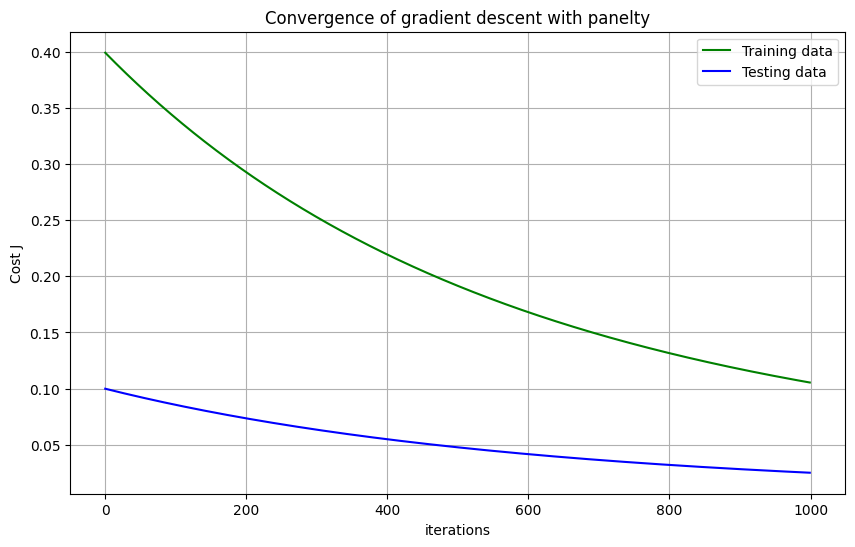

In [239]:
plt.plot(cost_History_Train, label = "Training data", color='green')
plt.plot(cost_History_Test, label = "Testing data",color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent with panelty')
plt.legend()

In [240]:
print("Final Theta - ")
print(theta)

Final Theta - 
[ 4.41198356e-11 -5.15289516e-01 -6.43998163e-02 -2.69673050e-02
  6.52959925e-03 -4.24711162e-02]


As it can be observed Normalization with added penalty gives slightly lower cost for testing data in Q3A compared to Q2 A normalization.

---



---



## ** SECOND PARTS**

# ** 1.b) Develop a gradient decent training and evaluation code that predicts housing price based on the following input variables:**

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

In [241]:
data = pd.read_csv('machine-learning/Data/Housing.csv',na_values='*')
display(data)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [242]:
#converting yes's & no's to 1s & 0s as strings cannot be used only int
list1 = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map (v1) :
  return v1.map({'yes' : 1, "no": 0})
data[list1] = data[list1] . apply(binary_map)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [243]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dataTrain, dataTest =train_test_split(data, train_size = 0.8, test_size = 0.2)
dataTrain.shape

(436, 13)

In [244]:
list2 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
dataTrainA = dataTrain[list2]
dataTestA = dataTest[list2]
dataTrainA.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
496,2695000,4000,2,1,1,1,0,0,0,0,0,0
484,2870000,3040,2,1,1,0,0,0,0,0,0,0
507,2590000,3600,2,1,1,1,0,0,0,0,0,0
252,4515000,9860,3,1,1,1,0,0,0,0,0,0


In [245]:
yTrain = dataTrainA.values[:,0]
xTrain = dataTrainA.values[:,1:12]
yTest = dataTestA.values[:,0]
xTest = dataTestA.values[:,1:12]
xTrain.shape

(436, 11)

In [246]:
#1 col of ones
x11 = np.ones((436, 1))
x12 = np.ones((109, 1))

In [247]:
# 1d to 2d
x21 = xTrain.reshape(436, 11)
x22 = xTest.reshape(109, 11)

In [248]:
xTrainNew = np.hstack((x11, x21))
xTestNew = np.hstack((x12, x22))
xTrainNew.shape

(436, 12)

In [249]:
# initializing
iterations = 1000;
alpha = 0.000000001;
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [250]:
# defined cost function
def compute_function(X, Y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)
  return J

In [251]:
def gradient_descent(X1, X2, Y1 , Y2, theta, alpha, iterations):
  cost_History_Train = np.zeros(iterations)
  cost_History_Test = np.zeros(iterations)

  for i in range(iterations):
    predictions = X1.dot(theta)
    errors = np.subtract(predictions, Y1)
    sum_delta = (alpha / m) * X1.transpose().dot(errors);
    theta = theta - sum_delta;
    cost_History_Train[i] = compute_function(X1, Y1, theta)
    cost_History_Test[i] = compute_function(X2, Y2, theta)
  return theta, cost_History_Train, cost_History_Test

In [252]:
theta, cost_History_Train, cost_History_Test = gradient_descent(xTrainNew, xTestNew, yTrain,
yTest, theta, alpha, iterations)
print('Final value of theta =', theta)
print('costHistoryTrain =', cost_History_Train[-1], 'costHistoryTest= ', cost_History_Test[-1])

Final value of theta = [4.16134503e-01 8.61036221e+02 1.49720328e+00 7.88268149e-01
 1.19127732e+00 3.76967060e-01 1.56671026e-01 2.57835061e-01
 6.13757700e-02 2.98030922e-01 3.85293377e-01 1.71925936e-01]
costHistoryTrain = 1363688558628.3276 costHistoryTest=  310132069893.81555


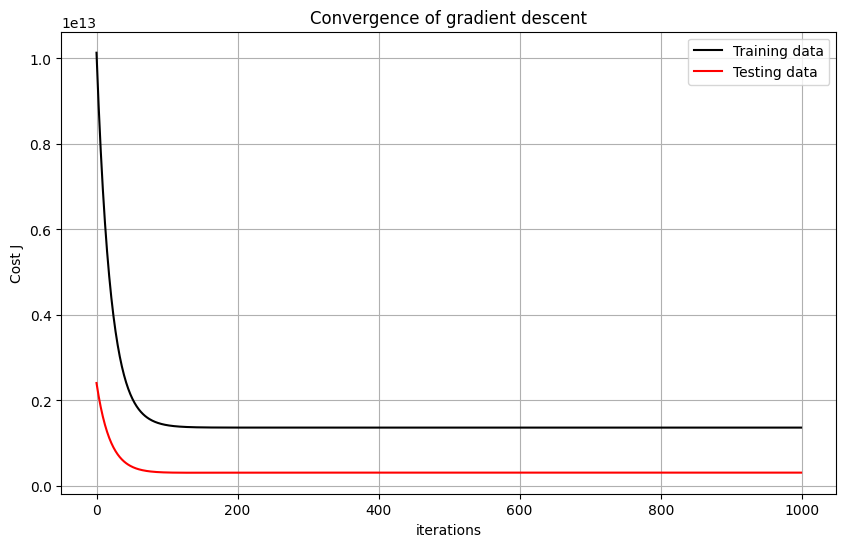

In [253]:
plt.plot(cost_History_Train, label = "Training data",color= 'black')
plt.plot(cost_History_Test, label = "Testing data", color='red')
plt.rcParams["figure.figsize"] = (10,8)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent')
plt.legend()

In [254]:
print("Final Theta - ")
print(theta)

Final Theta - 
[4.16134503e-01 8.61036221e+02 1.49720328e+00 7.88268149e-01
 1.19127732e+00 3.76967060e-01 1.56671026e-01 2.57835061e-01
 6.13757700e-02 2.98030922e-01 3.85293377e-01 1.71925936e-01]


# Identify the best parameters for your linear regression model, based on the above input variables are area, bedrooms, bathrooms, stories, parking.





---



---



---


# 2.b) Repeat problem 1 b, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization.

In [255]:
data = pd.read_csv('machine-learning/Data/Housing.csv',na_values='*')
display(data)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [256]:
#converting yes's & no's to 1s & 0s as strings cannot be used only int
list1 = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map (v1) :
  return v1.map({'yes' : 1, "no": 0})
data[list1] = data[list1] . apply(binary_map)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [257]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dataTrain, dataTest =train_test_split(data, train_size = 0.8, test_size = 0.2)
dataTrain.shape

(436, 13)

In [258]:
list2 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
dataTrainB = dataTrain[list2]
dataTestB = dataTest[list2]
dataTrainA.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
496,2695000,4000,2,1,1,1,0,0,0,0,0,0
484,2870000,3040,2,1,1,0,0,0,0,0,0,0
507,2590000,3600,2,1,1,1,0,0,0,0,0,0
252,4515000,9860,3,1,1,1,0,0,0,0,0,0


In [259]:
#from matplotlib.colors import Normalize
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler, Normalizer

scaler = Normalizer()
dataTrainB[list2] = scaler.fit_transform(dataTrainB[list2])
dataTestB[list2] = scaler.fit_transform(dataTestB[list2])
dataTrainB.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,0.999998,0.002069,1.142855e-06,5.714273e-07,5.714273e-07,5.714273e-07,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
496,0.999999,0.001484,7.421142e-07,3.710571e-07,3.710571e-07,3.710571e-07,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
484,0.999999,0.001059,6.968637e-07,3.484319e-07,3.484319e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
507,0.999999,0.001390,7.722000e-07,3.861000e-07,3.861000e-07,3.861000e-07,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
252,0.999998,0.002184,6.644502e-07,2.214834e-07,2.214834e-07,2.214834e-07,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
263,1.000000,0.000900,6.802718e-07,2.267573e-07,4.535146e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
240,1.000000,0.000838,6.543073e-07,2.181024e-07,4.362049e-07,2.181024e-07,0.000000e+00,0.000000e+00,0.0,0.0,2.181024e-07,2.181024e-07
175,0.999998,0.001867,7.619034e-07,3.809517e-07,3.809517e-07,1.904759e-07,1.904759e-07,0.000000e+00,0.0,0.0,3.809517e-07,0.000000e+00
385,0.999999,0.001020,5.602238e-07,2.801119e-07,2.801119e-07,2.801119e-07,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
374,1.000000,0.000967,5.494503e-07,5.494503e-07,2.747251e-07,2.747251e-07,0.000000e+00,2.747251e-07,0.0,0.0,0.000000e+00,0.000000e+00


In [260]:
yTrain = dataTrainB.values[:,0]
xTrain = dataTrainB.values[:,1:12]
yTest = dataTestB.values[:,0]
xTest = dataTestB.values[:,1:12]
xTrain.shape

(436, 11)

In [261]:
#1 col of ones
x11 = np.ones((436, 1))
x12 = np.ones((109, 1))

In [262]:
# 1d to 2d
x21 = xTrain.reshape(436, 11)
x22 = xTest.reshape(109, 11)

In [263]:
xTrainNew = np.hstack((x11, x21))
xTestNew = np.hstack((x12, x22))
xTrainNew.shape

(436, 12)

In [264]:
# initializing
iterations = 1000;
alpha = 0.001;
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [265]:
# defined cost function
def compute_function(X, Y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)
  return J

In [266]:
def gradient_descent(X1, X2, Y1 , Y2, theta, alpha, iterations):
  cost_History_Train = np.zeros(iterations)
  cost_History_Test = np.zeros(iterations)

  for i in range(iterations):
    predictions = X1.dot(theta)
    errors = np.subtract(predictions, Y1)
    sum_delta = (alpha / m) * X1.transpose().dot(errors);
    theta = theta - sum_delta;
    cost_History_Train[i] = compute_function(X1, Y1, theta)
    cost_History_Test[i] = compute_function(X2, Y2, theta)
  return theta, cost_History_Train, cost_History_Test

In [267]:
theta, cost_History_Train, cost_History_Test = gradient_descent(xTrainNew, xTestNew, yTrain,
yTest, theta, alpha, iterations)
print('Final value of theta =', theta)
print('costHistoryTrain =', cost_History_Train[-1], 'costHistoryTest= ', cost_History_Test[-1])

Final value of theta = [5.50814207e-01 6.31638694e-04 3.79383116e-07 1.59928440e-07
 2.24396941e-07 1.09659686e-07 1.80798937e-08 3.76692640e-08
 4.30489304e-09 3.32522046e-08 8.02998347e-08 2.48342871e-08]
costHistoryTrain = 0.08070661862402707 costHistoryTest=  0.020176660623237197


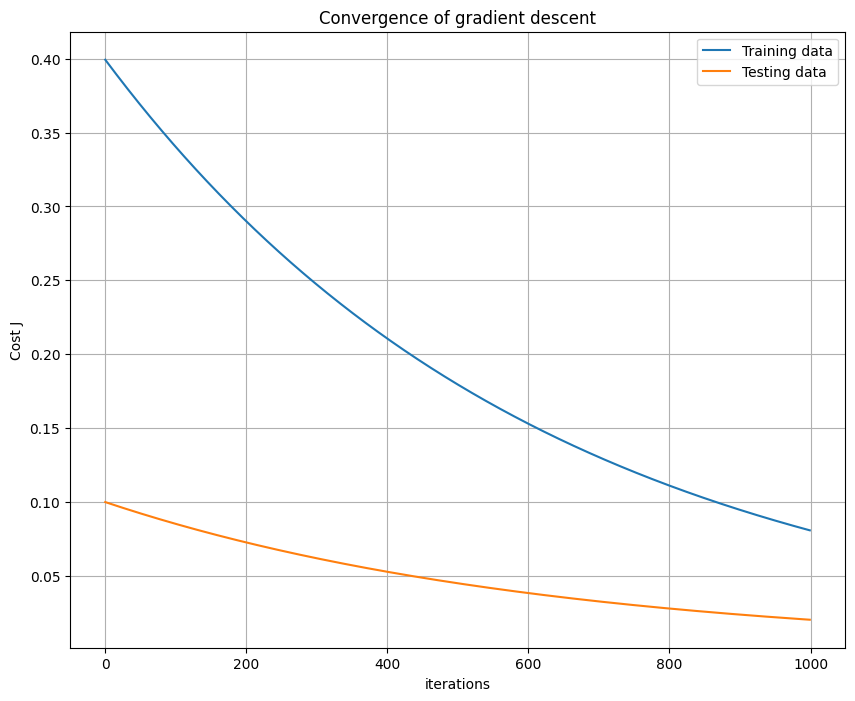

In [268]:
plt.plot(cost_History_Train, label = "Training data")
plt.plot(cost_History_Test, label = "Testing data")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent')
plt.legend()

In [269]:
print("Final Theta - ")
print(theta)

Final Theta - 
[5.50814207e-01 6.31638694e-04 3.79383116e-07 1.59928440e-07
 2.24396941e-07 1.09659686e-07 1.80798937e-08 3.76692640e-08
 4.30489304e-09 3.32522046e-08 8.02998347e-08 2.48342871e-08]


## **FOR STANDERDIZATION**

In [270]:
data = pd.read_csv('machine-learning/Data/Housing.csv',na_values='*')


In [271]:
#converting yes's & no's to 1s & 0s as strings cannot be used only int
list1 = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map (v1) :
  return v1.map({'yes' : 1, "no": 0})
data[list1] = data[list1] . apply(binary_map)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [272]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dataTrain, dataTest =train_test_split(data, train_size = 0.8, test_size = 0.2)
dataTrain.shape

(436, 13)

In [273]:
list2 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
dataTrainB = dataTrain[list2]
dataTestB = dataTest[list2]
dataTrainA.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
496,2695000,4000,2,1,1,1,0,0,0,0,0,0
484,2870000,3040,2,1,1,0,0,0,0,0,0,0
507,2590000,3600,2,1,1,1,0,0,0,0,0,0
252,4515000,9860,3,1,1,1,0,0,0,0,0,0


In [274]:
#from matplotlib.colors import Normalize
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler, Normalizer
scaler = StandardScaler()
dataTrainB[list2] = scaler.fit_transform(dataTrain[list2])
dataTestB[list2] = scaler.fit_transform(dataTest[list2])
dataTrainB.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,-1.586001,-0.716772,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
496,-1.090971,-0.538936,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
484,-0.999299,-0.988206,-1.294376,-0.573307,-0.933142,-2.527811,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
507,-1.145974,-0.726132,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
252,-0.137579,2.203478,0.052516,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
263,-0.192583,-0.553912,0.052516,-0.573307,0.212914,-2.527811,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
240,-0.100910,-0.613815,0.052516,-0.573307,0.212914,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,0.325559,1.753501
175,0.247444,2.175399,1.399408,1.475561,0.212914,0.395599,2.159245,-0.698609,-0.201427,-0.691351,1.470267,-0.570288
385,-0.632610,-0.707412,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
374,-0.595941,-0.763571,-1.294376,1.475561,-0.933142,0.395599,-0.463125,1.431416,-0.201427,-0.691351,-0.819149,-0.570288


In [275]:
yTrain = dataTrainB.values[:,0]
xTrain = dataTrainB.values[:,1:12]
yTest = dataTestB.values[:,0]
xTest = dataTestB.values[:,1:12]
xTrain.shape

(436, 11)

In [276]:
#1 col of ones
x11 = np.ones((436, 1))
x12 = np.ones((109, 1))

In [277]:
# 1d to 2d
x21 = xTrain.reshape(436, 11)
x22 = xTest.reshape(109, 11)

In [278]:
xTrainNew = np.hstack((x11, x21))
xTestNew = np.hstack((x12, x22))
xTrainNew.shape

(436, 12)

In [279]:
# initializing
iterations = 1000;
alpha = 0.001;
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [280]:
# defined cost function
def compute_function(X, Y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)
  return J

In [281]:
def gradient_descent(X1, X2, Y1 , Y2, theta, alpha, iterations):
  cost_History_Train = np.zeros(iterations)
  cost_History_Test = np.zeros(iterations)

  for i in range(iterations):
    predictions = X1.dot(theta)
    errors = np.subtract(predictions, Y1)
    sum_delta = (alpha / m) * X1.transpose().dot(errors);
    theta = theta - sum_delta;
    cost_History_Train[i] = compute_function(X1, Y1, theta)
    cost_History_Test[i] = compute_function(X2, Y2, theta)
  return theta, cost_History_Train, cost_History_Test

In [282]:
theta, cost_History_Train, cost_History_Test = gradient_descent(xTrainNew, xTestNew, yTrain,
yTest, theta, alpha, iterations)
print('Final value of theta =', theta)
print('costHistoryTrain =', cost_History_Train[-1], 'costHistoryTest= ', cost_History_Test[-1])

Final value of theta = [1.24322163e-16 2.03435919e-01 1.15017439e-01 1.91590974e-01
 1.50589379e-01 9.31295494e-02 9.22133533e-02 7.32983833e-02
 6.46240446e-02 1.65986586e-01 1.24899160e-01 1.33881668e-01]
costHistoryTrain = 0.1416234360482168 costHistoryTest=  0.03565694433435686


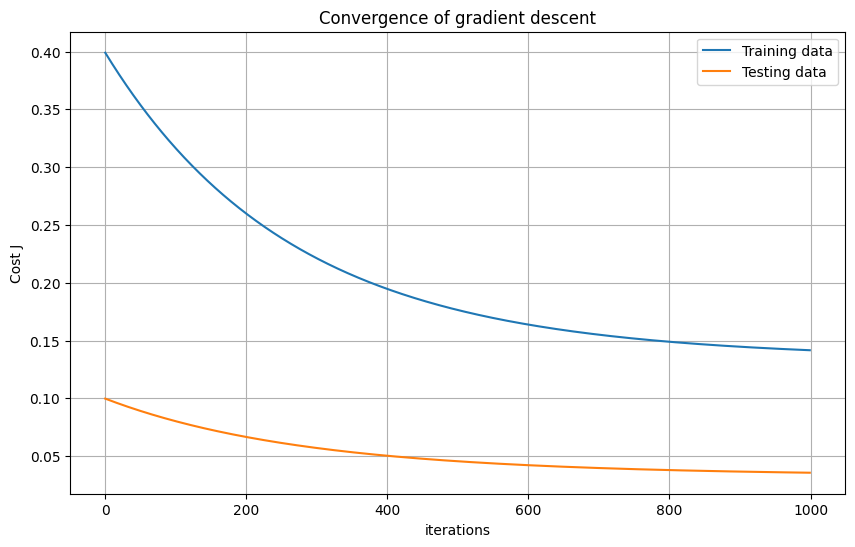

In [283]:
plt.plot(cost_History_Train, label = "Training data")
plt.plot(cost_History_Test, label = "Testing data")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent')
plt.legend()

In [284]:
print("Final Theta - ")
print(theta)

Final Theta - 
[1.24322163e-16 2.03435919e-01 1.15017439e-01 1.91590974e-01
 1.50589379e-01 9.31295494e-02 9.22133533e-02 7.32983833e-02
 6.46240446e-02 1.65986586e-01 1.24899160e-01 1.33881668e-01]


# **Observation:**
with normalised train data model learns well when compared to satandardized train data, but for test data, model performed almost similar.

When compared with Q.1, Q.2 requires large learning rate while in Q1 very small learning rate was needed. Thus, with normalization and standerdization, it  help the model to learn more efficiently.

# 3.b) Repeat problem 2 b, this time by adding parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic (parameter update equations), but you don’t need to change the equation to compute MSE loss for the training and evaluation set.

# **NORMALIZATION**

In [285]:
data = pd.read_csv('machine-learning/Data/Housing.csv',na_values='*')


In [286]:
#converting yes's & no's to 1s & 0s as strings cannot be used only int
list1 = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map (v1) :
  return v1.map({'yes' : 1, "no": 0})
data[list1] = data[list1] . apply(binary_map)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [287]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dataTrain, dataTest =train_test_split(data, train_size = 0.8, test_size = 0.2)
dataTrain.shape

(436, 13)

In [288]:
list2 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
dataTrainC = dataTrain[list2]
dataTestC = dataTest[list2]
dataTrainC.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
496,2695000,4000,2,1,1,1,0,0,0,0,0,0
484,2870000,3040,2,1,1,0,0,0,0,0,0,0
507,2590000,3600,2,1,1,1,0,0,0,0,0,0
252,4515000,9860,3,1,1,1,0,0,0,0,0,0


In [329]:
#from matplotlib.colors import Normalize
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler, Normalizer

scaler = Normalizer()
dataTrainC[list2] = scaler.fit_transform(dataTrainC[list2])
dataTestC[list2] = scaler.fit_transform(dataTestC[list2])
dataTrainC.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,-0.551246,-0.249128,-0.449886,-0.199264,-0.324332,0.137498,-0.160968,-0.242815,-0.070010,-0.240293,-0.284711,-0.198215
496,-0.420560,-0.207755,-0.498970,-0.221005,-0.359718,0.152500,-0.178531,-0.269308,-0.077648,-0.266510,-0.315775,-0.219841
484,-0.272407,-0.269384,-0.352845,-0.156283,-0.254373,-0.689078,-0.126247,-0.190440,-0.054909,-0.188461,-0.223299,-0.155460
507,-0.430405,-0.272720,-0.486141,-0.215323,-0.350469,0.148579,-0.173940,-0.262383,-0.075652,-0.259657,-0.307656,-0.214188
252,-0.047328,0.758008,0.018066,-0.197221,-0.321006,0.136088,-0.159318,-0.240325,-0.069292,-0.237828,-0.281792,-0.196182
263,-0.063056,-0.181364,0.017195,-0.187714,0.069713,-0.827665,-0.151638,-0.228741,-0.065952,-0.226365,-0.268209,-0.186726
240,-0.043742,-0.266071,0.022764,-0.248512,0.092292,0.171481,-0.200751,-0.302827,-0.087313,-0.299681,0.141121,0.760092
175,0.059514,0.523215,0.336578,0.354894,0.051209,0.095147,0.519330,-0.168026,-0.048446,-0.166280,0.353621,-0.137163
385,-0.255108,-0.285273,-0.521973,-0.231193,-0.376301,0.159530,-0.186761,-0.281723,-0.081228,-0.278796,-0.330332,-0.229976
374,-0.192376,-0.246489,-0.417838,0.476326,-0.301228,0.127703,-0.149501,0.462076,-0.065023,-0.223175,-0.264430,-0.184095


In [330]:
yTrainC = dataTrainC.values[:,0]
xTrainC = dataTrainC.values[:,1:12]
yTestC = dataTestC.values[:,0]
xTestC = dataTestC.values[:,1:12]
xTrainC.shape

(436, 11)

In [331]:
#1 col of ones
x11 = np.ones((436, 1))
x12 = np.ones((109, 1))

In [332]:
# 1d to 2d
x21 = xTrainC.reshape(436, 11)
x22 = xTestC.reshape(109, 11)

In [333]:
xTrainNewC = np.hstack((x11, x21))
xTestNewC = np.hstack((x12, x22))
xTrainNewC.shape

(436, 12)

In [340]:
# initializing
iterations = 1000;
alpha = 0.1;
penalty_lambda=10
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [341]:
# defined cost function
def compute_function(X, Y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)
  return J

In [342]:
# defined gradient descent with penalty
def gradient_descent_with_panelty(X1, X2, Y1 , Y2, theta, alpha, iterations,penalty_lambda):
  cost_History_Train = np.zeros(iterations)
  cost_History_Test = np.zeros(iterations)

  for i in range(iterations):
    predictions = X1.dot(theta)
    errors = np.subtract(predictions, Y1)
    sum_delta = (alpha / m) * X1.transpose().dot(errors);
    penalty =np.multiply((penalty_lambda * alpha / m), theta)
    sum_delta += penalty
    theta = theta - sum_delta;
    cost_History_Train[i] = compute_function(X1, Y1, theta)
    cost_History_Test[i] = compute_function(X2, Y2, theta)
  return theta,  cost_History_Train,   cost_History_Test

In [343]:
theta, cost_History_Train, cost_History_Test = gradient_descent_with_panelty(xTrainNewC, xTestNewC, yTrain,yTest, theta, alpha, iterations,penalty_lambda)
print('Final value of theta =', theta)
print('cost_History_Train =', cost_History_Train[-1], 'cost_History_Test= ', cost_History_Test[-1])

Final value of theta = [0.11236517 0.80684899 0.26531033 0.73255837 0.5745634  0.41891013
 0.31517471 0.1518656  0.33084271 0.5179676  0.31504897 0.43799361]
cost_History_Train = 0.17062518472291696 cost_History_Test=  0.045533482051697445


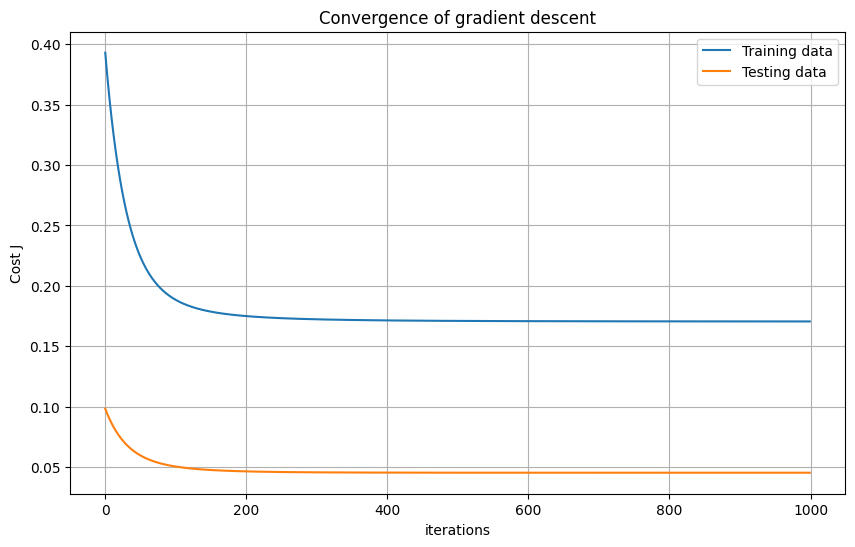

In [344]:
plt.plot(cost_History_Train, label = "Training data")
plt.plot(cost_History_Test, label = "Testing data")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent')
plt.legend()

In [339]:
print("Final Theta - ")
print(theta)

Final Theta - 
[0.00598941 0.1035664  0.07417944 0.09782495 0.08023869 0.04459378
 0.06014364 0.04839738 0.0207003  0.09286873 0.07270822 0.0754982 ]


# **for standardization**

In [300]:
data = pd.read_csv('machine-learning/Data/Housing.csv',na_values='*')

In [301]:
#converting yes's & no's to 1s & 0s as strings cannot be used only int
list1 = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map (v1) :
  return v1.map({'yes' : 1, "no": 0})
data[list1] = data[list1] . apply(binary_map)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [346]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dataTrain, dataTest =train_test_split(data, train_size = 0.8, test_size = 0.2)
dataTrain.shape

(436, 13)

In [347]:
list2 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
dataTrainC = dataTrain[list2]
dataTestC = dataTest[list2]
dataTrainC.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
496,2695000,4000,2,1,1,1,0,0,0,0,0,0
484,2870000,3040,2,1,1,0,0,0,0,0,0,0
507,2590000,3600,2,1,1,1,0,0,0,0,0,0
252,4515000,9860,3,1,1,1,0,0,0,0,0,0


In [348]:
#from matplotlib.colors import Normalize
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler, Normalizer
scaler = StandardScaler()
dataTrainC[list2] = scaler.fit_transform(dataTrain[list2])
dataTestC[list2] = scaler.fit_transform(dataTest[list2])
dataTrainC.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,-1.586001,-0.716772,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
496,-1.090971,-0.538936,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
484,-0.999299,-0.988206,-1.294376,-0.573307,-0.933142,-2.527811,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
507,-1.145974,-0.726132,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
252,-0.137579,2.203478,0.052516,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
263,-0.192583,-0.553912,0.052516,-0.573307,0.212914,-2.527811,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
240,-0.100910,-0.613815,0.052516,-0.573307,0.212914,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,0.325559,1.753501
175,0.247444,2.175399,1.399408,1.475561,0.212914,0.395599,2.159245,-0.698609,-0.201427,-0.691351,1.470267,-0.570288
385,-0.632610,-0.707412,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
374,-0.595941,-0.763571,-1.294376,1.475561,-0.933142,0.395599,-0.463125,1.431416,-0.201427,-0.691351,-0.819149,-0.570288


In [349]:
yTrainC = dataTrainC.values[:,0]
xTrainC = dataTrainC.values[:,1:12]
yTestC = dataTestC.values[:,0]
xTestC = dataTestC.values[:,1:12]
xTrainC.shape

(436, 11)

In [350]:
#1 col of ones
x11 = np.ones((436, 1))
x12 = np.ones((109, 1))

In [351]:
# 1d to 2d
x21 = xTrainC.reshape(436, 11)
x22 = xTestC.reshape(109, 11)

In [352]:
xTrainNewC = np.hstack((x11, x21))
xTestNewC = np.hstack((x12, x22))
xTrainNewC.shape

(436, 12)

In [353]:
# initializing
iterations = 1000;
alpha = 0.001;
penalty_lambda=10
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [354]:
# defined cost function
def compute_function(X, Y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)
  return J

In [355]:
# defined gradient descent with penalty
def gradient_descent_with_panelty(X1, X2, Y1 , Y2, theta, alpha, iterations,penalty_lambda):
  cost_History_Train = np.zeros(iterations)
  cost_History_Test = np.zeros(iterations)

  for i in range(iterations):
    predictions = X1.dot(theta)
    errors = np.subtract(predictions, Y1)
    sum_delta = (alpha / m) * X1.transpose().dot(errors);
    penalty =np.multiply((penalty_lambda * alpha / m), theta)
    sum_delta += penalty
    theta = theta - sum_delta;
    cost_History_Train[i] = compute_function(X1, Y1, theta)
    cost_History_Test[i] = compute_function(X2, Y2, theta)
  return theta,  cost_History_Train,   cost_History_Test

In [356]:
theta, cost_History_Train, cost_History_Test = gradient_descent_with_panelty(xTrainNewC, xTestNewC, yTrain,yTest, theta, alpha, iterations,penalty_lambda)
print('Final value of theta =', theta)
print('cost_History_Train =', cost_History_Train[-1], 'cost_History_Test= ', cost_History_Test[-1])

Final value of theta = [1.23357092e-16 2.02074069e-01 1.14388450e-01 1.90314872e-01
 1.49610595e-01 9.25703752e-02 9.16628283e-02 7.28630192e-02
 6.41179484e-02 1.64886811e-01 1.24143383e-01 1.33021226e-01]
cost_History_Train = 0.14208862381080217 cost_History_Test=  0.03580926596675021


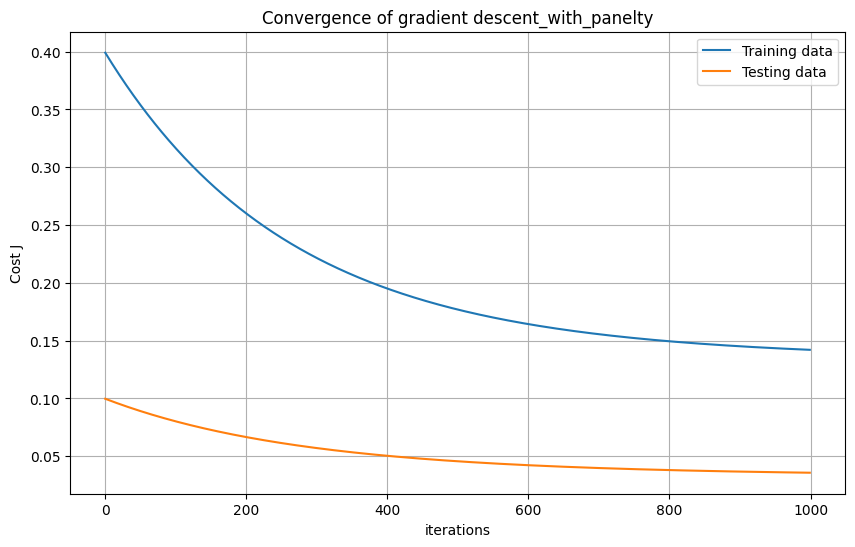

In [357]:
plt.plot(cost_History_Train, label = "Training data")
plt.plot(cost_History_Test, label = "Testing data")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent_with_panelty')
plt.legend()

In [359]:
print("Final Theta - ")
print(theta)

Final Theta - 
[1.23357092e-16 2.02074069e-01 1.14388450e-01 1.90314872e-01
 1.49610595e-01 9.25703752e-02 9.16628283e-02 7.28630192e-02
 6.41179484e-02 1.64886811e-01 1.24143383e-01 1.33021226e-01]


# ** Explain your results and compare them against problem 2 b.** **


Ans:
The cost of 3B is lower than 2B for same preprocessing normalization. Standardization doesn’t give any differences.



---



---


